In [13]:
from lib import *

Pipeline = pipeline.Pipeline
RegressionValidator = pipeline.RegressionValidator

DatasetProvider = provider.DatasetProvider
DatasetUploader = provider.DatasetUploader

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tqdm._tqdm_notebook import tqdm_notebook
from tqdm._tqdm_notebook import tqdm
tqdm_notebook.pandas()

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [15]:
import pickle

def load_pickle(dataset, name):
    dataset.to_pickle(name + '.pkl')

def from_pickle(path):
    with open(path, 'rb') as reader:
        return pickle.load(reader)

In [16]:
errors = from_pickle('tmp/xgb_error.pkl')

In [17]:
errors

(19.326576164622693,
 array([-0.00788719, -0.01397875, -0.01397875, ...,  0.06834503,
         0.06609754,  0.06757435], dtype=float32),
          target
 id             
 54          0.0
 114         0.0
 174         0.0
 234         0.0
 294         0.0
 ...         ...
 1330036     0.0
 1330090     0.0
 1330142     0.0
 1330150     0.0
 1330156     0.0
 
 [422577 rows x 1 columns])

In [18]:
def get_statistics(report):
    stat = report[2]
    stat['residuals'] = report[1] - report[2]
    stat['predicted'] = report[1]
    stat['id'] = report[2].index
    return stat

In [19]:
report = get_statistics(errors)

ValueError: Unable to coerce to Series, length must be 1: given 422577

In [ ]:
report

,target,residuals,id
id,,,
54,0.0,0.660865,54
114,0.0,0.660661,114
174,0.0,0.659950,174
234,0.0,0.660865,234
294,0.0,0.660607,294
...,...,...,...
1330036,0.0,0.659366,1330036
1330090,0.0,0.660008,1330090
1330142,0.0,0.660982,1330142


In [ ]:
# sns.histplot(data=report, x='residuals')

<AxesSubplot:xlabel='residuals'>

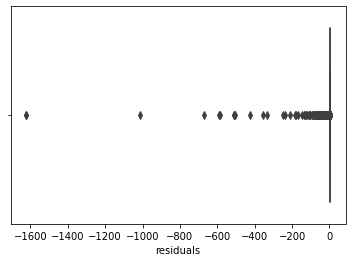

In [ ]:
sns.boxplot(data=report, x='residuals')

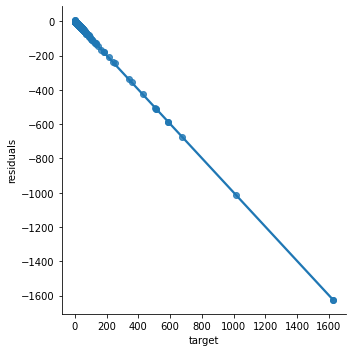

In [ ]:
sns.lmplot(data=report, x='target', y='residuals')

1) Model is unable to make big predictions

In [ ]:
# sns.histplot(report.residuals.sample(n=1000), kde=True)